# Lab 6 Tunable Oscillations and Hopf Bifurcation


> Yujia, Ethan, and Vincent adapted from materials developed by Diane and Elizabeth
> 
> 2024/5/2 and 5/3 (Week 7)

Edit this document directly. As you go through the notebooks you will find numbered questions. Please answer in the cells provided. 
   
This is an individual assignment, but you are allowed (encouraged!) to work together in groups and discuss coding and
answers. That said, you are responsible for all the material in this laboratory assignment. **DO NOT
COPY from anyone that you work with.** You are **NOT** allowed to share code. You need to write the code
and answer the questions yourself. Try the coding yourself first before seeking help.

<div class="alert alert-info" role="alert">

Please rename your notebook to `Lastname_Firstname_prelab#` and export it as HTML for submission

__Total Points 20 + 2 bonus points__

__Due: 5/9 Thursday 1:30 pm (week 8) if you attend Thursday Lab sessions or 5/10 Friday 1:30 pm if you attend Friday Lab sessions__ 
</div> 

If you have any questions, please do not hesitate to ask. You can find the emails and office hours of your instructors and TAs on Canvas. Best of luck!

Feel free to go to the Quantitative Biosciences Center for help! 
[https://college.uchicago.edu/academics/quantitative-biosciences-center](https://college.uchicago.edu/academics/quantitative-biosciences-center) 


<div class="alert alert-warning" role="warning">

Total points = 20 + 2 bonus points

1.1 = 1'

1.2 = 2'

1.3 = 2'

1.4 = 1'

1.5 = 3' Creating an array of $k_3$ 1'. Solving the traces and plotting 2'.

2.1 = 3' Rubics same as 1.5

2.2 = 1' Each sub-question is 0.5'.

3.1 = 3' Using only the second half of the trajectories 1'. Rest of the code 1'. Plotting 1'.

3.2 = 3' Rubics same as 3.1

3.3 = 1'

3.4 = 2' Bonus points. 1' for correctly reporting each Hopf point.
    
</div>

<!--
<div class="alert alert-warning" role="warning">   
    
### Points
    
#### Part 1: 10 pts   
1.1 - 3pts   
    - RHS equation: 1pt      
    - ODEint: 1pt   
    - plot: 1pt   

1.2 - 3pts   
    - loop: 1 pt   
    - odeint: 1 pt   
    - plot: 1 pt   
    
1.3 - 3pts   
    loop: 1 pt   
    odeint: 1 pt   
    plot: 1 pt
    
#### Part 2: 10 pts   
    
2.1 - 2pts   
    - RHS equation and ODEint: 1pt   
    - plot: 1pt 
    
2.2 - 3pts   
    loop: 1 pt   
    odeint: 1 pt   
    plot: 1 pt
2.3 - 3pts   
    loop: 1 pt   
    odeint: 1 pt   
    plot: 1 pt
    
2.4 - 1 pt  
    
#### Part 3: 10 pts
   Terminal value function: 3pts   
   looping over k3s: 1 pt   
   calculating max and min: 1pt    
   List of max and mins: 1 pt   
   Plot: 3pts   
   Answer: 1 pt
#### Part 4: 10 pts
4.1
    Terminal value function: 3pts   
    looping over k3s: 1 pt   
    calculating max and min: 1pt    
    List of max and mins: 1 pt   
    Plot: 3pts   
    Answer: 1 pt

        
</div>   
-->

## Part 1 Exploring the Negative-Only Repressilator

Today's lab is adapted from some analysis in the Tsai et al. 2008 paper [_Robust, Tunable Biological Oscillations from Interlinked Positive and Negative Feedback Loops_](https://www.science.org/doi/10.1126/science.1156951) published in Science. 

The paper is on Canvas - I recommend that you read it as it'a concise, 4-page, and insightful paper.
This lab directly uses the model in Fig. 4A and B.
That said, reading the paper is __not necessary__ for completing any of the tasks.

![Negative only repressilator](https://raw.githubusercontent.com/yuja-liu/bios20236_2024/main/lab6/figs/negative_only_network.bmp)
Figure by courtesy Tsai et al. 2008 Fig. 4A

The focus of this lab is a pair of __repressilator__ model shown in Fig. 4A and B.
This first variant consists of purely negative connections. Formally,

$$
\begin{align}
\frac{dA}{dt} &= k_1(1-A)-\frac{k_2C^{n1}}{K_1^{n1} + C^{n1}}A\\
\frac{dB}{dt} &= k_3(1-B)-\frac{k_4A^{n2}}{K_2^{n2} + A^{n2}}B\\
\frac{dC}{dt} &= k_5(1-C)-\frac{k_6B^{n3}}{K_3^{n3} + B^{n3}}C
\end{align}
$$

Here the ordinary differential equations describe a scenario where 
all three gene/protein, $A$, $B$, and $C$, can interconvert between an active and an inactive form.
The state variables represent the dynamics of the active forms.
The conversion to the active forms is _inhibited_ by another gene/protein as shown in the circuit.


Start with a set of parameters:

$$
\begin{align}
k_1 &= k_3 = k_5 = 0.5\\
k_2 &= k_4 = k_6 = 10\\
K_1 &= K_2 = K_3 = 0.2\\
n1 &= n2 = n3 = 4
\end{align}
$$

__1.1 (1')__ Write down a right-hand side function for the repressilator model and integrate it from initial condition $A_0 = 0.1$, $B_0 = C_0 = 0$.
Use time span from 0 to 10.
Plot the concentration of gene/protein $A$, $B$, and $C$ against time in the same graph.

__Tip:__ If you have an n-column 2D array `sol` and you want to plot each column as a different curve all in one graph, 
simply write

```python
plt.plot(tspan, sol, label=["name_1", "name_2", ..., "name_n"])
```

assuming that `tspan` is an 1D array whose length is the same as the number of rows in `sol`.
Python will interpret it as plotting each column of `sol` as a new curve - You don't have to call `plt.plot` n times!

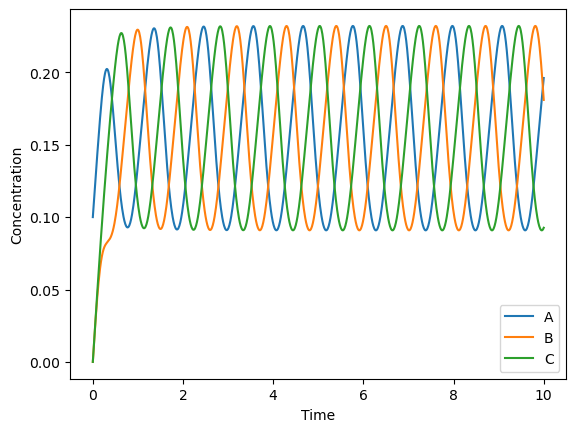

In [1]:
# your solution 1.1

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

def rhs_neg_only(u, t, k1, k2, k3, k4, k5, k6, K1, K2, K3, n1, n2, n3):
    A,B,C = u
    
    dAdt = k1*(1 - A) - (k2*C**n1)/(K1**n1 + C**n1)*A
    dBdt = k3*(1 - B) - (k4*A**n2)/(K2**n2 + A**n2)*B
    dCdt = k5*(1 - C) - (k6*B**n3)/(K3**n3 + B**n3)*C
    
    return dAdt, dBdt, dCdt

k1 = k3 = k5 = 0.5
k2 = k4 = k6 = 10
K1 = K2 = K3 = 0.2
n1 = n2 = n3 = 4

args = (k1, k2, k3, k4, k5, k6, K1, K2, K3, n1, n2, n3)

tspan = np.linspace(0, 10, 1001)

u0 = [0.1, 0, 0]

sol = odeint(rhs_neg_only, u0, tspan, args)

plt.plot(tspan, sol, label=["A", "B", "C"])
plt.legend()
plt.ylabel("Concentration")
plt.xlabel("Time")
plt.show()

__1.2 (2') Different Initial Conditions.__
Using the same parameters and time span as 1.1, solve trajectories starting from the following initial conditions

$$
(A_0, B_0, C_0) = (0.1, 0, 0),\; (0, 0.1, 0),\; (0.1, 0.1, 0.1),\; (0.101, 0.1, 0.1),\; (0.1, 0.1, 0),\; (0, 0.2, 0.2)
$$

Plot the trajectories in the __A-B phase plane__ that means throwing away the C-dynamics and time information.
Set the A- and B-axis to be between 0 and 0.3.

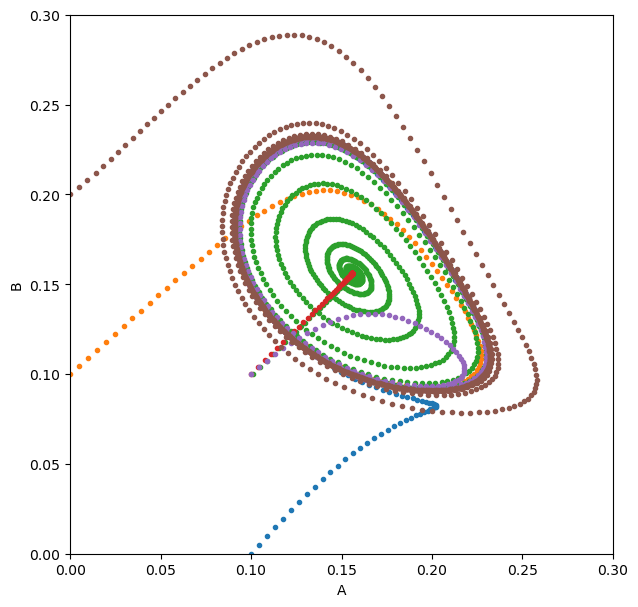

In [3]:
# your solution 1.2

k1 = k3 = k5 = 0.5
k2 = k4 = k6 = 10
K1 = K2 = K3 = 0.2
n1 = n2 = n3 = 4

tspan = np.linspace(0, 10, 1001)
init_vec = [[0.1, 0, 0], [0, 0.1, 0], [0.101, 0.1, 0.1],
            [0.1, 0.1, 0.1], [0.1, 0.1, 0], [0, 0.2, 0.2]]
args = (k1, k2, k3, k4, k5, k6, K1, K2, K3, n1, n2, n3)

# plot
p, ax = plt.subplots(figsize=(7, 7))

for u0 in init_vec:
    sol = odeint(rhs_neg_only, u0, tspan, args)
    ax.plot(sol[:, 0], sol[:, 1], '.')

ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_xlim(0, 0.3)
ax.set_ylim(0, 0.3)
plt.show()

__1.3 (2')__ In 1.2 you looked at the trajectories in the 3D _phase space_ projected to the A-B phase plane.
Now, repeat 1.2 but project the same trajectories to the A-C phase plane.

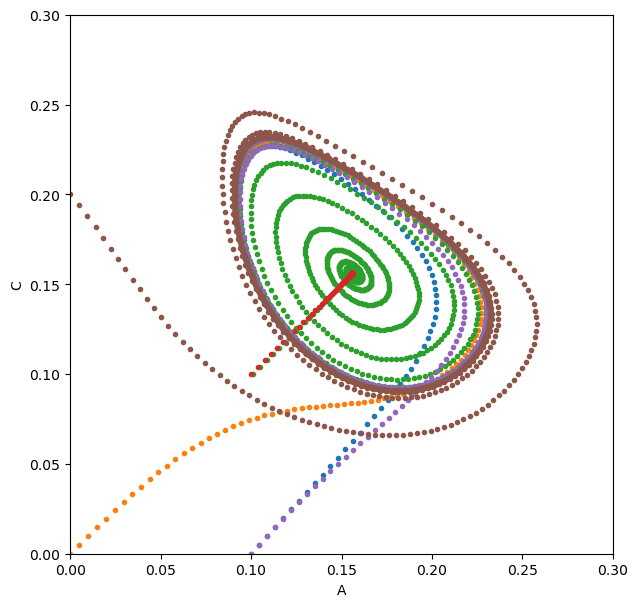

In [4]:
# your solution 1.3

k1 = k3 = k5 = 0.5
k2 = k4 = k6 = 10
K1 = K2 = K3 = 0.2
n1 = n2 = n3 = 4

tspan = np.linspace(0, 10, 1001)
init_vec = [[0.1, 0, 0], [0, 0.1, 0], [0.101, 0.1, 0.1],
            [0.1, 0.1, 0.1], [0.1, 0.1, 0], [0, 0.2, 0.2]]
args = (k1, k2, k3, k4, k5, k6, K1, K2, K3, n1, n2, n3)

# plot
p, ax = plt.subplots(figsize=(7, 7))

for u0 in init_vec:
    sol = odeint(rhs_neg_only, u0, tspan, args)
    ax.plot(sol[:, 0], sol[:, 2], '.')

ax.set_xlabel("A")
ax.set_ylabel("C")
ax.set_xlim(0, 0.3)
ax.set_ylim(0, 0.3)
plt.show()

__1.4 (1')__ You should see a steady state wrapped around by a limit cycle. Based on the trajectories, is the steady state stable? Why or why not?

__Edit this cell to include your answer__

No because a small perturbation in the initial condition (the green v. the red trajectory) drives the system away from the steady state.

__1.5 (3') Change parameter $k_3$__ while keeping other parameters the same.
Use a range of $k_3$ from 0 to 1.6 in steps of 0.2.

For each value of $k_3$ integrate the model using time span 0 to 20 and plot $A$, $B$, and $C$ __against time__ in the same plot.
Use initial condition $A_0 = 0.1,\; B_0 = C_0 = 0.$
Make a new plot for each value of $k_3$.
Please include the value of $k_3$ in the plot title.

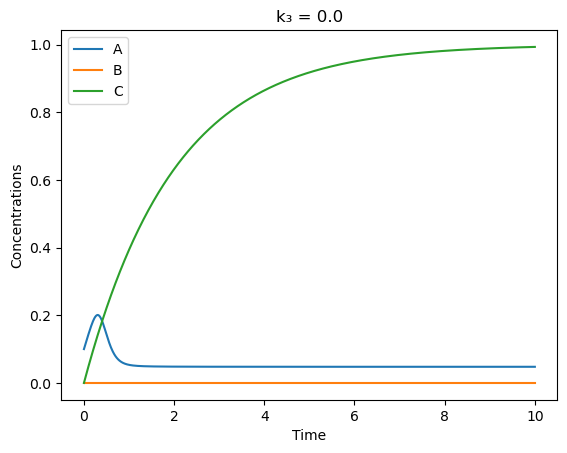

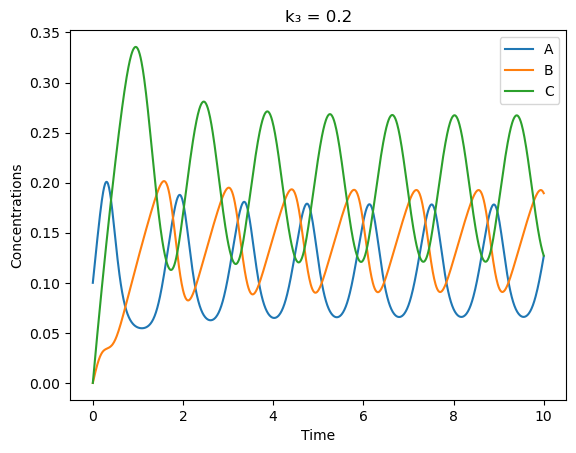

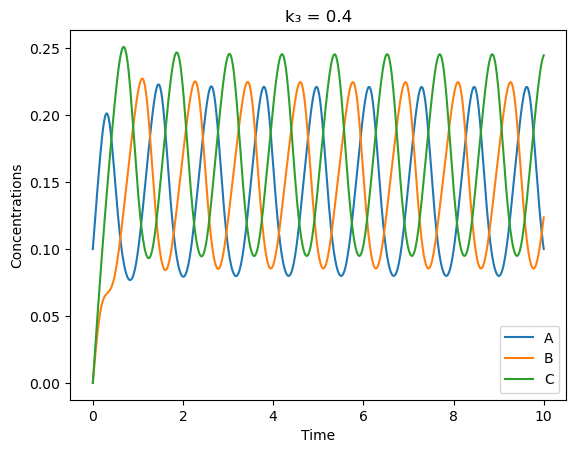

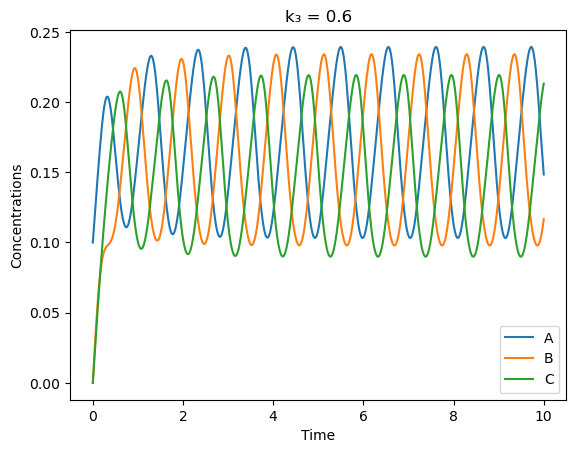

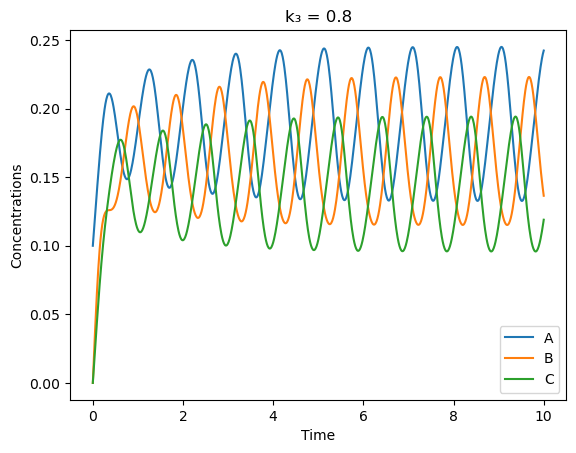

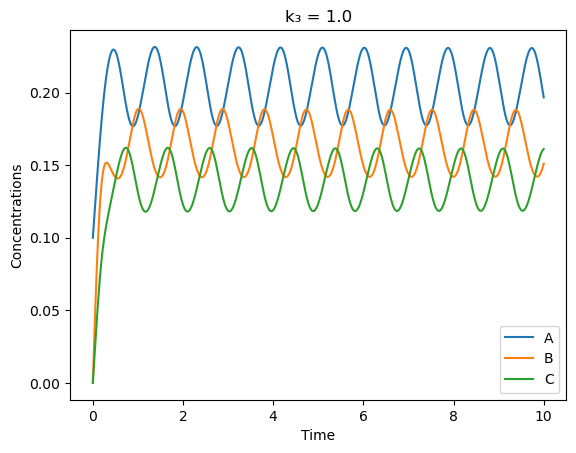

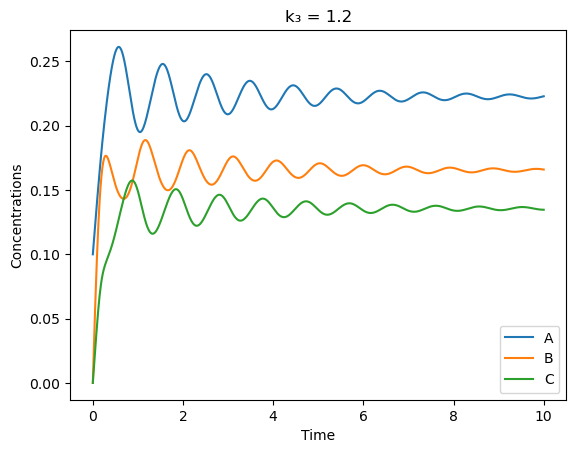

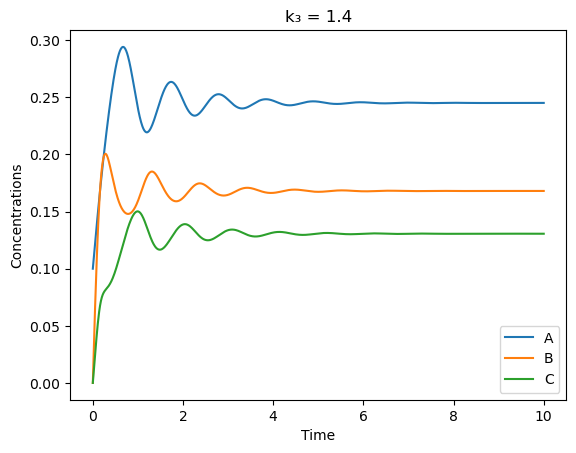

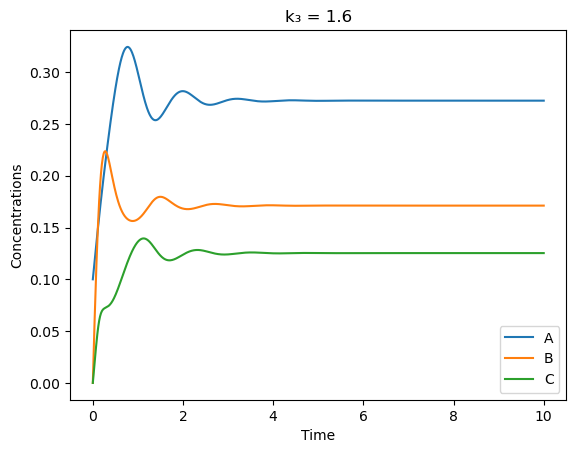

In [64]:
# your solution 1.5

k3_vec = np.arange(0, 1.6 + 0.2, 0.2)

tspan = np.linspace(0, 10, 1001)

for k3 in k3_vec:
    u0 = [0.1, 0, 0]
    args = (k1, k2, k3, k4, k5, k6, K1, K2, K3, n1, n2, n3)

    sol = odeint(rhs_neg_only, u0, tspan, args)

    plt.figure()
    plt.plot(tspan, sol, label=["A", "B", "C"])
    plt.xlabel("Time")
    plt.ylabel("Concentrations")
    plt.title(f"k₃ = {k3:.1f}")
    plt.legend()

## Part 2 Positive-Plus-Negative Repressilator

![Positive-and-negative repressilator](https://raw.githubusercontent.com/yuja-liu/bios20236_2024/main/lab6/figs/positive_plus_negative_network.bmp)
Figure by courtesy Tsai et al. 2008 Fig. 4B

Add a positive autoregulation to node $A$. How would this change affect the dynamics of the system aross varying $k_3$?

$$
\begin{align}
\frac{dA}{dt} &= k_1(1-A)-\frac{k_2C^{n1}}{K_1^{n1} + C^{n1}}A + k_7(1-A)\frac{A^{n4}}{K_4^{n4} + A^{n4}}\\
\frac{dB}{dt} &= k_3(1-B)-\frac{k_4A^{n2}}{K_2^{n2} + A^{n2}}B\\
\frac{dC}{dt} &= k_5(1-C)-\frac{k_6B^{n3}}{K_3^{n3} + B^{n3}}C
\end{align}
$$

Please use these parameters:

$$
\begin{align}
k_1 &= 0.02\\
k_3 &= k_5 = 0.5\\
k_2 &= k_4 = k_6 = 10\\
k_7 &= 1\\
K_1 &= K_2 = K_3 = K_4 = 0.2\\
n1 &= n2 = n3 = n4 = 4
\end{align}
$$


__2.1 (3') How does the positive-plus-negative repressilator respond to change in $k_3$?__

Repeat 1.5 but with the new network and new set of parameters.
Use the same range of $k_3$.

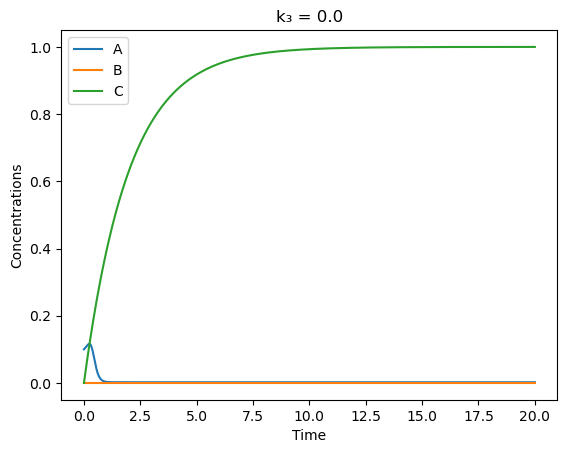

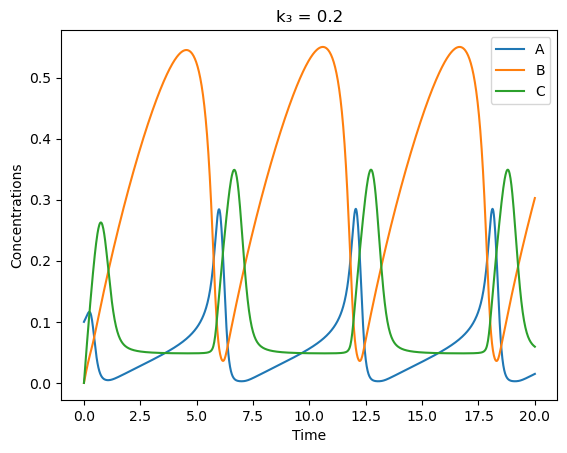

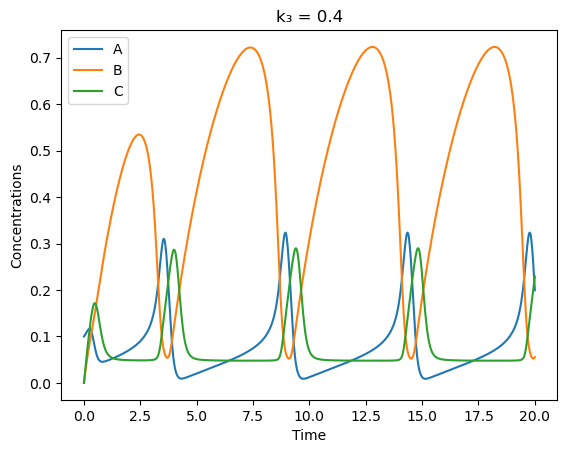

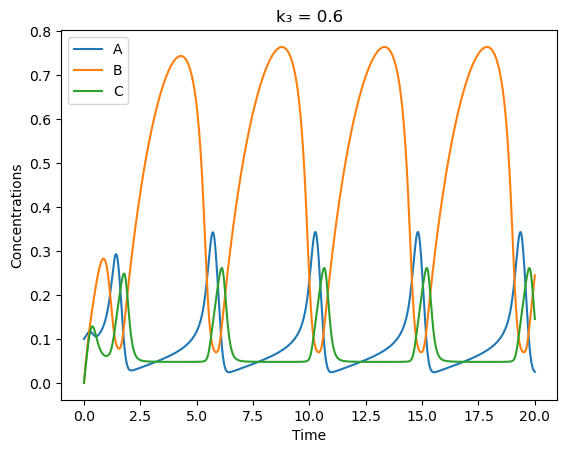

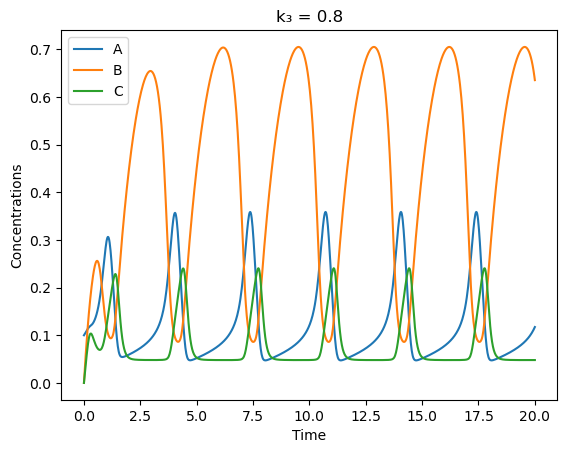

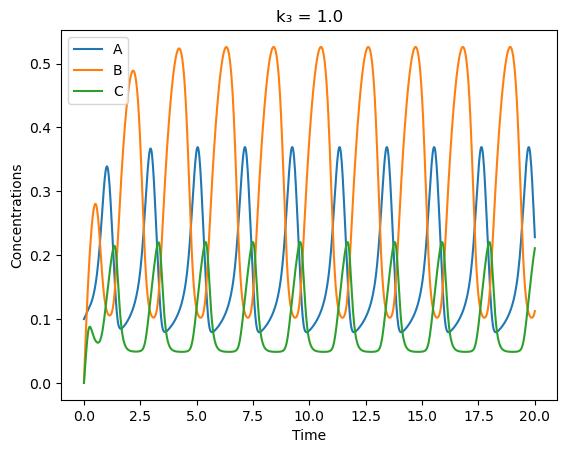

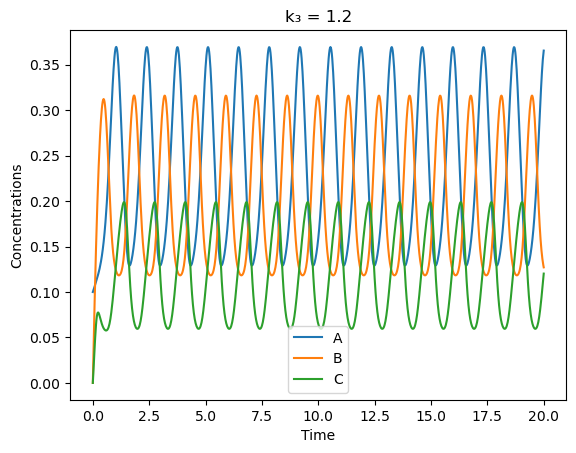

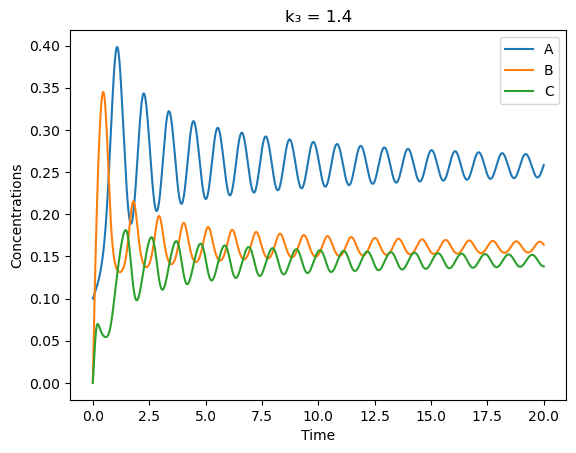

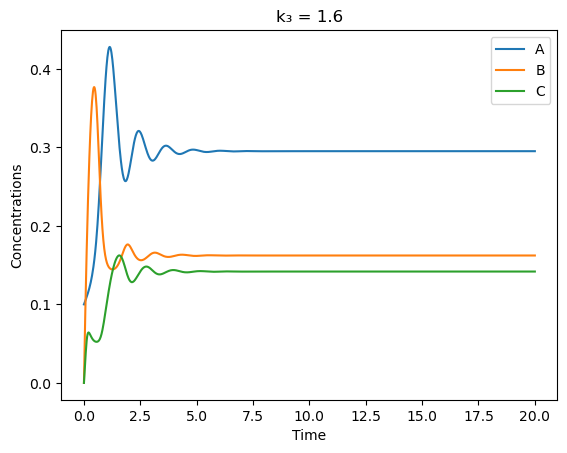

In [5]:
# your solution 2.1

def rhs_pos_plus_neg(u, t, k1, k2, k3, k4, k5, k6, k7, K1, K2, K3, K4, n1, n2, n3, n4):
    A,B,C = u
    
    dAdt = k1*(1 - A) - (k2*C**n1)/(K1**n1 + C**n1)*A + k7*(1 - A)*A**n4/(K4**n4 + A**n4)
    dBdt = k3*(1 - B) - (k4*A**n2)/(K2**n2 + A**n2)*B
    dCdt = k5*(1 - C) - (k6*B**n3)/(K3**n3 + B**n3)*C
    
    return dAdt, dBdt, dCdt

k5 = 0.5
k2 = k4 = k6 = 10
K1 = K2 = K3 = K4 = 0.2
n1 = n2 = n3 = n4 = 4
k1 = 0.02
k7 = 1

k3_vec = np.arange(0, 1.6 + 0.2, 0.2)

tspan = np.linspace(0, 20, 1001)

for k3 in k3_vec:
    u0 = [0.1, 0, 0]
    args = (k1, k2, k3, k4, k5, k6, k7, K1, K2, K3, K4, n1, n2, n3, n4)

    sol = odeint(rhs_pos_plus_neg, u0, tspan, args)

    plt.figure()
    plt.plot(tspan, sol, label=["A", "B", "C"])
    plt.xlabel("Time")
    plt.ylabel("Concentrations")
    plt.title(f"k₃ = {k3:.1f}")
    plt.legend()

__2.2 (1')__ With the given set of parameters, which of the two networks shows a wider range of $k_3$ that
permits oscillation?
Within the range of $k_3$ that permits oscillation, which network shows more _tunability_,
i.e. variability, in terms of the period?

__Edit this cell to include your answer__

The positive-plus-negative repressilator.

The positive-plus-negative repressilator. Just eyeballing, when tuning $k_3$ the period of the positive-plus-negative repressilator
ranges between 1 and 6 while that for the negative-only repressilator seems to range only between 1 and 1.5

## Part 3 Hopf Bifurcation

A Hopf bifurcation is a critical point at which __a limit cycle collides into a steady state or a steady state gives birth to a limit cycle__
as a parameter varies.

If a _stable_ limit cycle collides into/emerges from a steady state, the bifurcation is known as a _supercritical_ Hopf bifurcation.
In a biological context, the system transitions from converging to a biochemical equilibrium to oscillating (or vice versa) when the bifurcation happens.

<img src="https://github.com/yuja-liu/bios20236_2024/blob/main/lab6/figs/supercritical_hopf_bifurcation.png?raw=true" alt="A sketch of a supercritical Hopf bifurcation" width="600px" />

If an _unstable_ limit cycle collides into/emerges from a steady state, the bifurcation is known as a _subcritical_ Hopf bifurcation.

<img src="https://github.com/yuja-liu/bios20236_2024/blob/main/lab6/figs/subcritical_hopf_bifurcation.png?raw=true" alt="A sketch of a subcritical Hopf bifurcation" width="600px" />

You have solved trajectories of both repressilator models with varying $k_3$ in Part 1 and 2.
You should've seen that if $k_3$ goes too small or too large, the oscillation disappears.
These are instances of a Hopf bifurcation -
Oscillatory dynamics emerges from or disappears at a Hopf bifurcation.

In this part of the lab you will draw __bifurcation diagrams__ for the negative-only and the positive-plus-negative repressilator.
In a bifurcation diagram, the steady state(s) or the limit cycle(s) of a system is plotted against a __control parameter__ which 
in this case is $k_3$.
You have made bifurcation diagrams before in Lab 2 question 3.2 for the bistable positively autoregulated motif!
That bifurcation diagram showed two branches of stable steady states.


A bifurcation diagram is a great way to summarize the behavior of a system over a range of parameters.
__Here is an example of a Hopf bifurcation diagram:__

<img src="https://github.com/dschnitkey/BIOS20236/blob/main/hopf.png?raw=true" alt= “” width="300">

The convention is to plot __the peak and trough of the oscillation__ in the _oscillatory region_.
Outside of the oscillatory region, simply plot the steady state.



<h3 style="color:blue;">Tasks for Part 3:</h3>

Practically, we will follow these steps to make a Hopf bifurcation diagram:

1. Integrate the system for a _long enough time_ at each value of $k_3$. The long time span is crucial because we are interested in the behavior of the system
when it _stabilizes_ to either a steady state or a limit cycle.
2. Find the long-term maximum and minimum of the system. If the system oscillates, the maximum and minimum are respectively the peak and trough of the oscillation. Otherwise, the maximum and minimum will be the same and we find the steady state instead!
3. Plot the minima and maxima against the control parameter $k_3$.

<img src="https://github.com/dschnitkey/BIOS20236/blob/main/isoscillating.png?raw=true" alt= “” width="500">

The repressilator models are 3D and we only have the capacity to show one of the dimensions in the bifurcation diagram. Here we will choose to show $A$.

__3.1 (3')__ Complete the code to make a Hopf bifurcation diagram for the negative-only repressilator ($A$ against $k_3$).

__Tips:__

1. To find the smallest or the largest element in an array, use the builtin `min` or `max` function. The usage is

```python
min_value = min(my_array)
```

2. As a reminder, the syntax to append an element to a list is

```python
my_list.append(my_element)
```

3. We will throw away the first half of the trajectory and only find the minimum and maximum in the second half. This is to ensure that the trajectory stabilizes. E.g., if the trajectory contains 2000 time points, we will only use time points number 1001 to 2000.

In [ ]:
# your solution 3.1

# Define parameters other than k3
k1 = k5 = 0.5
k2 = k4 = k6 = 10
K1 = K2 = K3 = 0.2
n1 = n2 = n3 = 4

# Define an array of different k3 values
k3_vec = np.linspace(0, 1.6, 101)

# Initialize two empty arrays to store the minima and maxima
min_vec = []
max_vec = []

# Define time span
LEN = 5001
tspan = np.linspace(0, 200, LEN)

# Define the initial condition
u0 = [0.1, 0, 0]    # A0, B0, C0

# Loop through k3 values
!!complete the for command!!
    
    # Pack the parameters into a tuple
    args = !!complete the code!!
    
    # Integrate
    sol = odeint(!!complete here your RHS function!!, u0, tspan, args)

    # Find the minimum in the A dynamics in the second half of the time span
    !!complete the code!!

    # Append the minimum to the vector of minima
    !!complete the code!!

    # Repeat the above two steps for the maximum
    !!complete the code!!

# Plot the minima and maxima against k3
plt.figure()
plt.plot(k3_vec, min_vec)
plt.plot(k3_vec, max_vec)
plt.xlabel("k₃")
plt.ylabel("A")
plt.title("Hopf Bifurcation Diagram of a Negative-Only Repressilator")
plt.show()

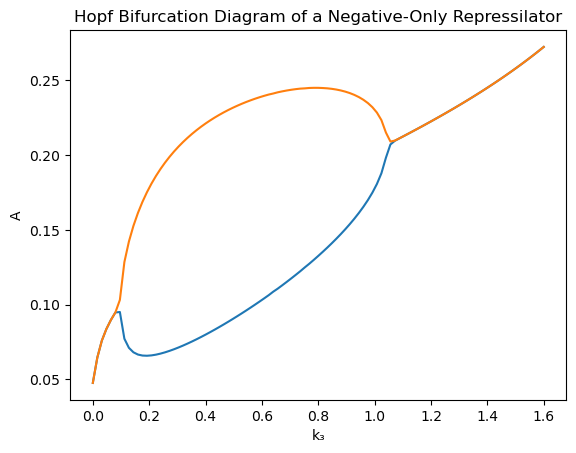

In [6]:
# your solution 3.1

# Define parameters other than k3
k1 = k5 = 0.5
k2 = k4 = k6 = 10
K1 = K2 = K3 = 0.2
n1 = n2 = n3 = 4

# Define an array of different k3 values
k3_vec = np.linspace(0, 1.6, 101)

# Initialize two empty arrays to store the minima and maxima
min_vec = []
max_vec = []

# Define time span
LEN = 5001
tspan = np.linspace(0, 200, LEN)

# Define the initial condition
u0 = [0.1, 0, 0]    # A0, B0, C0

# Loop through k3 values
for k3 in k3_vec:
    
    # Pack the parameters into a tuple
    args = (k1, k2, k3, k4, k5, k6, K1, K2, K3, n1, n2, n3)
    
    # Integrate
    sol = odeint(rhs_neg_only, u0, tspan, args)

    # Find the minimum in the A dynamics in the second half of the time span
    min_A = min(sol[(LEN//2 + 1):, 0])

    # Append the minimum to the vector of minima
    min_vec.append(min_A)

    # Repeat the above two steps for the maximum
    max_A = max(sol[(LEN//2 + 1):, 0])
    max_vec.append(max_A)

# Plot the minima and maxima against k3
plt.figure()
plt.plot(k3_vec, min_vec)
plt.plot(k3_vec, max_vec)
plt.xlabel("k₃")
plt.ylabel("A")
plt.title("Hopf Bifurcation Diagram of a Negative-Only Repressilator")
plt.show()

__3.2 (3')__ Complete the code to make a Hopf bifurcation diagram for the positive-plus-negative repressilator ($A$ against $k_3$).

In [ ]:
# your solution 3.2

# Define parameters other than k3
k5 = 0.5
k2 = k4 = k6 = 10
K1 = K2 = K3 = K4 = 0.2
n1 = n2 = n3 = n4 = 4
k1 = 0.02
k7 = 1

# Define an array of different k3 values
k3_vec = np.linspace(0, 1.6, 101)

# Initialize two empty arrays to store the minima and maxima
min_vec2 = []
max_vec2 = []

# Define time span
LEN = 5001
tspan = np.linspace(0, 200, LEN)

# Define the initial condition
u0 = [0.1, 0, 0]    # A0, B0, C0

# Loop through k3 values
!!complete the for command!!
    
    # Pack the parameters into a tuple
    args = !!complete the code!!
    
    # Integrate
    sol = odeint(!!compete here your RHS function!!, u0, tspan, args)

    # Find the minimum in the A dynamics in the second half of the time span
    !!complete the code!!

    # Append the minimum to the vector of minima
    !!complete the code!!

    # Repeat the above two steps for the maximum
    !!complete the code!!

# Plot the minima and maxima against k3
plt.figure()
plt.plot(k3_vec, min_vec2)
plt.plot(k3_vec, max_vec2)
plt.xlabel("k₃")
plt.ylabel("A")
plt.title("Hopf Bifurcation Diagram of a Positive-Plus-Negative Repressilator")
plt.show()

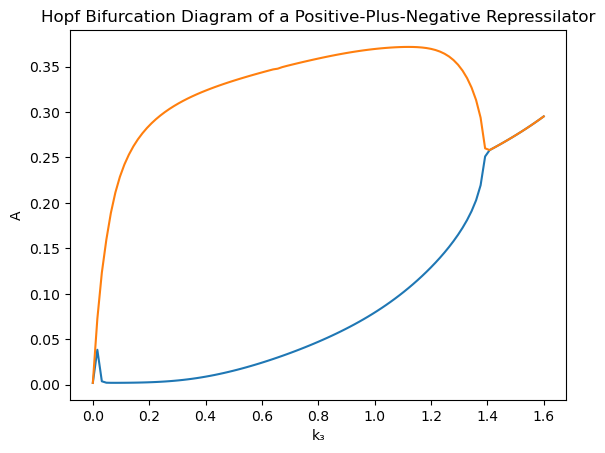

In [7]:
# your solution 3.2

# Define parameters other than k3
k5 = 0.5
k2 = k4 = k6 = 10
K1 = K2 = K3 = K4 = 0.2
n1 = n2 = n3 = n4 = 4
k1 = 0.02
k7 = 1

# Define an array of different k3 values
k3_vec = np.linspace(0, 1.6, 101)

# Initialize two empty arrays to store the minima and maxima
min_vec2 = []
max_vec2 = []

# Define time span
LEN = 5001
tspan = np.linspace(0, 200, LEN)

# Define the initial condition
u0 = [0.1, 0, 0]    # A0, B0, C0

# Loop through k3 values
for k3 in k3_vec:
    
    # Pack the parameters into a tuple
    args = (k1, k2, k3, k4, k5, k6, k7, K1, K2, K3, K4, n1, n2, n3, n4)
    
    # Integrate
    sol = odeint(rhs_pos_plus_neg, u0, tspan, args)

    # Find the minimum in the A dynamics in the second half of the time span
    min_A = min(sol[(LEN//2 + 1):, 0])

    # Append the minimum to the vector of minima
    min_vec2.append(min_A)

    # Repeat the above two steps for the maximum
    max_A = max(sol[(LEN//2 + 1):, 0])
    max_vec2.append(max_A)

# Plot the minima and maxima against k3
plt.figure()
plt.plot(k3_vec, min_vec2)
plt.plot(k3_vec, max_vec2)
plt.xlabel("k₃")
plt.ylabel("A")
plt.title("Hopf Bifurcation Diagram of a Positive-Plus-Negative Repressilator")
plt.show()

__3.3 Amplitude v. $k_3$ (1')__ Plot the peak-to-trough amplitude of the negative-only and the positive-plus-negative repressilators in the same graph.
Mark which curve corresponds to which model in the legend.

You can get the peak-to-trough amplitude by finding the difference between the long-term maximum and minimum of the A-dynamics.
When the system doesn't oscillate, consider the amplitude as 0.

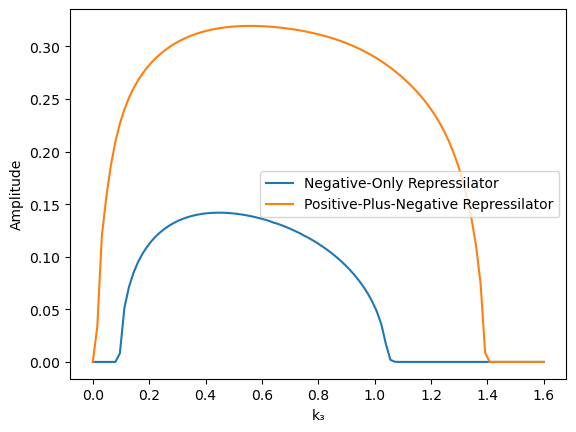

In [133]:
# your solution 3.3

amp_vec1 = abs(np.array(max_vec) - np.array(min_vec))
amp_vec2 = abs(np.array(max_vec2) - np.array(min_vec2))

plt.figure()
plt.plot(k3_vec, amp_vec1, label="Negative-Only Repressilator")
plt.plot(k3_vec, amp_vec2, label="Positive-Plus-Negative Repressilator")
plt.xlabel("k₃")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

__3.4 (Bonus points 2') Find the Hopf Points.__
Based on the array of minima and maxima you've found in 3.1,
find the smallest and largest $k_3$ value that permits oscillation for the __negative-only network__.
These are the values of $k_3$ where the Hopf bifurcation occurs and the specific parameter values are called the _Hopf points_.

Use `THRESHOLD = 1e-3`. We consider that the system oscillates if the peak-to-trough amplitude is greater than the threshold.

Scan through the array of minima and maxima. Find the first and the last index where the oscillation sustains.
Then, find the values of $k_3$ at these indices. Print the values out.

In [141]:
# your solution 3.4

THRESHOLD = 1e-3

amp_vec = abs(np.array(max_vec) - np.array(min_vec))

for i in range(len(k3_vec)):
    if amp_vec[i] > THRESHOLD:
        hopf1 = k3_vec[i]
        break

for i in range(len(k3_vec) - 1, -1, -1):
    if amp_vec[i] > THRESHOLD:
        hopf2 = k3_vec[i]
        break

print(f"The Hopf points for the negative-only network are {hopf1:.3f} and {hopf2:.3f}")

The Hopf points for the negative-only network are 0.096 and 1.056
